In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Data/sber_data.csv')
test = pd.read_csv('Data/diabetes_data.csv')
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


# Пропуски

hospital_beds_raion          47.392603
preschool_quota              21.948738
school_quota                 21.938893
life_sq                      20.947786
floor                         0.548062
metro_min_walk                0.082045
metro_km_walk                 0.082045
railroad_station_walk_km      0.082045
railroad_station_walk_min     0.082045
dtype: float64

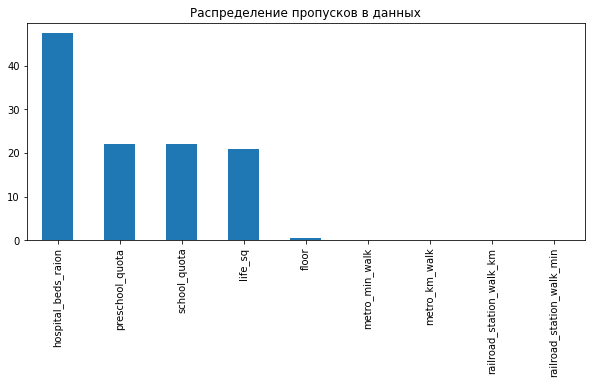

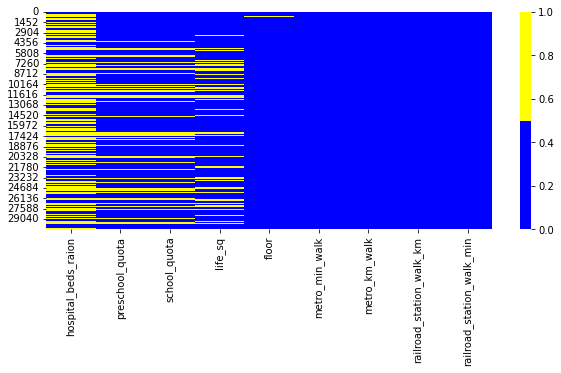

In [4]:
cols_null_percent = data.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
display(cols_with_null)

cols_with_null.plot(
    kind='bar',
    figsize=(10, 4),
    title='Распределение пропусков в данных'
)

colors = ['blue', 'yellow'] 
fig = plt.figure(figsize=(10, 4))
cols = cols_with_null.index
ax = sns.heatmap(
    data[cols].isnull(),
    cmap=sns.color_palette(colors),
)

In [5]:
#создаем копию исходной таблицы
drop_data = data.copy()
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = drop_data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
drop_data = drop_data.dropna(how='any', thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
drop_data = drop_data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
drop_data.isnull().mean()

id                                       0.0
full_sq                                  0.0
life_sq                                  0.0
floor                                    0.0
sub_area                                 0.0
preschool_quota                          0.0
preschool_education_centers_raion        0.0
school_quota                             0.0
school_education_centers_raion           0.0
school_education_centers_top_20_raion    0.0
healthcare_centers_raion                 0.0
university_top_20_raion                  0.0
sport_objects_raion                      0.0
additional_education_raion               0.0
culture_objects_top_25_raion             0.0
shopping_centers_raion                   0.0
office_raion                             0.0
oil_chemistry_raion                      0.0
railroad_terminal_raion                  0.0
nuclear_reactor_raion                    0.0
metro_min_avto                           0.0
metro_km_avto                            0.0
metro_min_

In [6]:
indicator_data = data.copy()
#в цикле пробегаемся по названиям столбцов с пропусками
for col in cols_with_null.index:
    #создаем новый признак-индикатор как col_was_null
    indicator_data[col + '_was_null'] = indicator_data[col].isnull()
#создаем словарь имя столбца: число(признак) на который надо заменить пропуски   
values = {
    'life_sq': indicator_data['full_sq'],
    'metro_min_walk': indicator_data['metro_min_walk'].median(),
    'metro_km_walk': indicator_data['metro_km_walk'].median(),
    'railroad_station_walk_km': indicator_data['railroad_station_walk_km'].median(),
    'railroad_station_walk_min': indicator_data['railroad_station_walk_min'].median(),
    'hospital_beds_raion': indicator_data['hospital_beds_raion'].mode()[0],
    'preschool_quota': indicator_data['preschool_quota'].mode()[0],
    'school_quota': indicator_data['school_quota'].mode()[0],
    'floor': indicator_data['floor'].mode()[0]
}
#заполняем пропуски в соответствии с заявленным словарем
indicator_data = indicator_data.fillna(values)
#выводим результирующую долю пропусков
indicator_data.isnull().mean()

id                                    0.0
full_sq                               0.0
life_sq                               0.0
floor                                 0.0
sub_area                              0.0
                                     ... 
floor_was_null                        0.0
metro_min_walk_was_null               0.0
metro_km_walk_was_null                0.0
railroad_station_walk_km_was_null     0.0
railroad_station_walk_min_was_null    0.0
Length: 70, dtype: float64

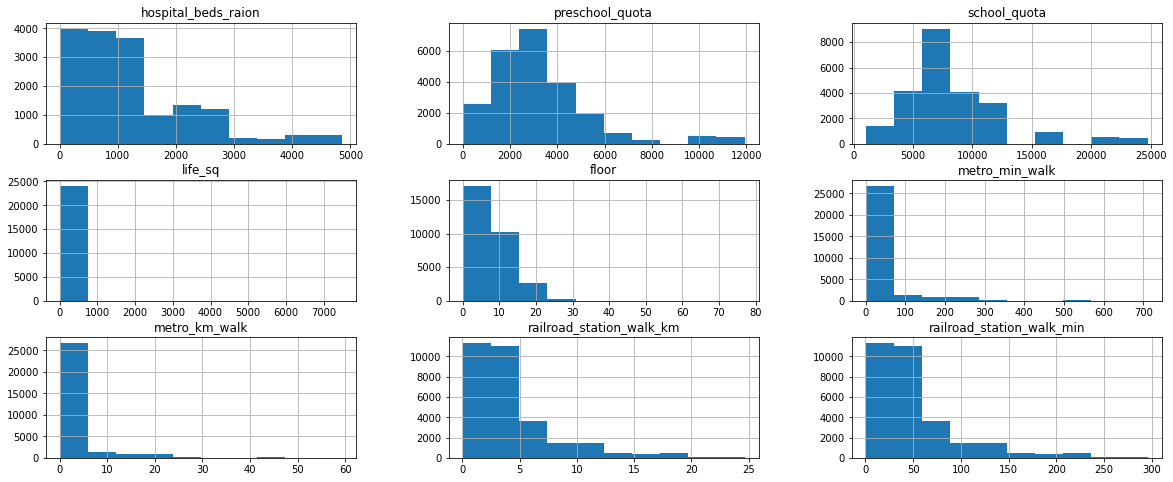

In [7]:
cols = cols_with_null.index
data[cols].hist(figsize=(20, 8));

# Дупликаты

In [8]:
dupl_columns = list(data.columns)
dupl_columns.remove('id')

mask = data.duplicated(subset=dupl_columns)
sber_duplicates = data[mask]
print(f'Число найденных дубликатов: {sber_duplicates.shape[0]}')

data_dedupped = data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {data.shape[0]}')

Число найденных дубликатов: 562
Результирующее число записей: 30471


In [9]:
def get_low_information_cols(data, freq=0.96, ratio=0.95):
    #список неинформативных признаков
    low_information_cols = [] 

    #цикл по всем столбцам
    for col in data.columns:
        #наибольшая относительная частота в признаке
        top_freq = data[col].value_counts(normalize=True).max()
        #доля уникальных значений от размера признака
        nunique_ratio = data[col].nunique() / data[col].count()
        # сравниваем наибольшую частоту с порогом
        if top_freq > freq:
            low_information_cols.append(col)
            print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
        # сравниваем долю уникальных значений с порогом
        if nunique_ratio > ratio:
            low_information_cols.append(col)
            print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
    return low_information_cols

low = get_low_information_cols(data)
information_sber_data = data.drop(low, axis=1)
print(f'Результирующее число признаков: {information_sber_data.shape[1]}')

id: 100.0% уникальных значений
oil_chemistry_raion: 99.03% одинаковых значений
railroad_terminal_raion: 96.27% одинаковых значений
nuclear_reactor_raion: 97.17% одинаковых значений
big_road1_1line: 97.44% одинаковых значений
mosque_count_1000: 98.08% одинаковых значений
Результирующее число признаков: 55


# Выбросы

## МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)
Визуализация помогает определить наличие выбросов. Для того чтобы их найти, можно воспользоваться статистическими подходами. 

Одним из таких подходов является **метод межквартильного размаха** (его еще называют методом Тьюки), который используется для построения коробчатой диаграммы.

Алгоритм метода:

- вычислить 25-ый и 75-ый квантили (первый и третий квартили) — Q25 и Q75 для признака, который мы исследуем;

- вычислить межквартильное расстояние: IQR = Q75 - Q25;

- вычислить верхнюю и нижнюю границы Тьюки: 
  - upper_bound = Q75 + IQR * 1.5
  - lower_bound = Q25 + IQR * 1.5

In [10]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False, plus=0):
    if log_scale:
        x = np.log(data[feature] + plus)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return outliers, cleaned

    
clean, _ = outliers_iqr_mod(data, "price_doc", left=3, right=3, log_scale=True)
print(clean.shape[0])

92


## МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)
![img](https://lms.skillfactory.ru/assets/courseware/v1/721bbe7e904e9a3f3700f24a7dba48fd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/dst-3-unit-1-mod-14-25.png)
Правило трёх сигм гласит: если распределение данных является нормальным, то 99,73 % лежат в интервале от (мю - 3сигма, мю + 3сигма), где (мю) — математическое ожидание (для выборки это среднее значение), а (сигма) — стандартное отклонение. Наблюдения, которые лежат за пределами этого интервала, будут считаться выбросами.

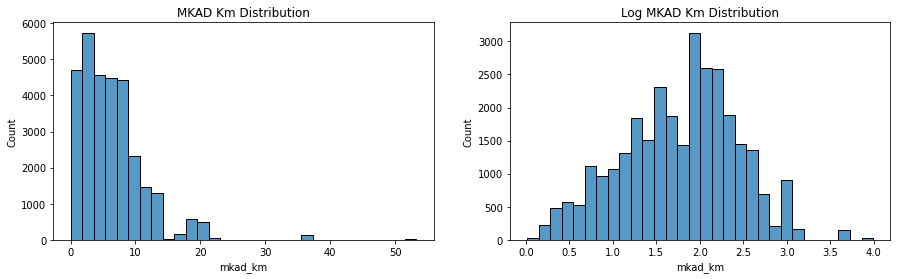

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

In [12]:
def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3, plus=0):
    if log_scale:
        x = np.log(data[feature] + plus)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

clean, _ = outliers_z_score_mod(data, "price_doc", left=3, right=3, log_scale=True)
print(clean.shape[0])

146


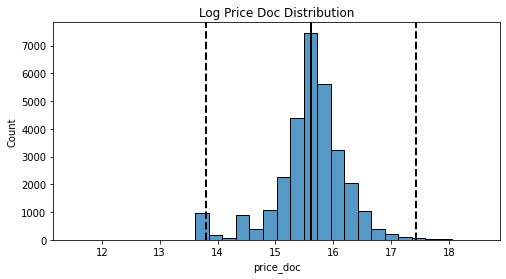

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_price = np.log(data['price_doc'] + 1)
histplot = sns.histplot(log_price, bins=30, ax=ax)
histplot.axvline(log_price.mean(), color='k', lw=2)
histplot.axvline(log_price.mean()+ 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.axvline(log_price.mean()- 3 * log_price.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Price Doc Distribution');

# Practice

In [14]:
test_dedupped = test.drop_duplicates()
test_dedupped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   Gender                    768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 66.0+ KB


In [15]:
###### NANS ######
low = get_low_information_cols(test_dedupped, freq=0.99, ratio=0.99)
test_ded_unl = test_dedupped.drop(low, axis=1)
test_ded_unl[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = test_ded_unl[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.nan, )

# delete columns where nans are greater than 30%
thresh = test_ded_unl.shape[0] * 0.7
cleaned = test_ded_unl.dropna(thresh=thresh, axis=1)

# delete rows with 2 or more nans
thresh = cleaned.shape[1] - 2
cleaned = cleaned.dropna(thresh=thresh ,axis=0)

values = {
    'Pregnancies': cleaned['Pregnancies'].median(),
    'Glucose': cleaned['Glucose'].median(),
    'BloodPressure': cleaned['BloodPressure'].median(),
    'SkinThickness': cleaned['SkinThickness'].median(),
    'BMI': cleaned['BMI'].median(),
    'Age': cleaned['Age'].median(),
    'Outcome': cleaned['Outcome'].median(),
}
cleaned = cleaned.fillna(values)

#cleaned.info()
#print(cleaned["SkinThickness"].mean())

Gender: 100.0% одинаковых значений


In [16]:
###### Outliers ######
outliers, _ = outliers_iqr_mod(cleaned, "SkinThickness")
print(f'IQR: Outliers {outliers.shape[0]}')
outliers, _ = outliers_z_score_mod(cleaned, "SkinThickness")
print(f'Z-Score: Outliers {outliers.shape[0]}')

outliers_iqr, _   = outliers_iqr_mod(cleaned, "DiabetesPedigreeFunction")
outliers_iqr_l, _ = outliers_iqr_mod(cleaned, "DiabetesPedigreeFunction", log_scale=True)
print(outliers_iqr.shape[0] - outliers_iqr_l.shape[0])

IQR: Outliers 87
Z-Score: Outliers 4
29
